# Clientes al por mayor

Trabajaremos con el dataset en Kaggle Wholesale customers data para la predicción del comportamiento de un cliente que va a comprar a una tienda por mayoreo.  Se desea pronosticar que tipo de productos son comprados juntos; por ejemplo, un cliente que es dueño de una cafetería y se encuentra en la sección de lacteos comprando leche, es más probable que compre seguido de eso compre en la sección de comestibles en compración de congelados o detergentes. Esto con el proposito de organizar la tienda para aumentar las ventas.

In [1]:
#importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA y PREPROCESAMIENTO
- 1.1 Carga y primer vistazo de los datos
- 1.2 Visualización de los datos
- 1.3 Análisis multivariado
- 1.4 Preprocesamiento (Escalamiento vs Estandarización vs Normalización)

## 1.1  Carga y primer vistazo de los datos

In [2]:
#importamos los datos
df = pd.read_csv("D:\Data_Science\Proyectos\Wholesale\Wholesale customers data.csv")

In [3]:
#primer vistazo al dataset
print(df.shape)
df.head()

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
#Tipos de datos de cada columna y si presenta valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# Resúmenes estadísticos
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Información obtenida:
- Tenemos un dataset de 440 registros y 8 columnas, sin valores nulos.
- Las columnas de Channel y Region son variables nominales, mientras que el resto son numéricas continuas.
- Las columnas de variable numéricas presentan valores máximos muy alejados del rango intercuantil por lo que es un indicio de outliers.

## 1.2 Visualización de los datos

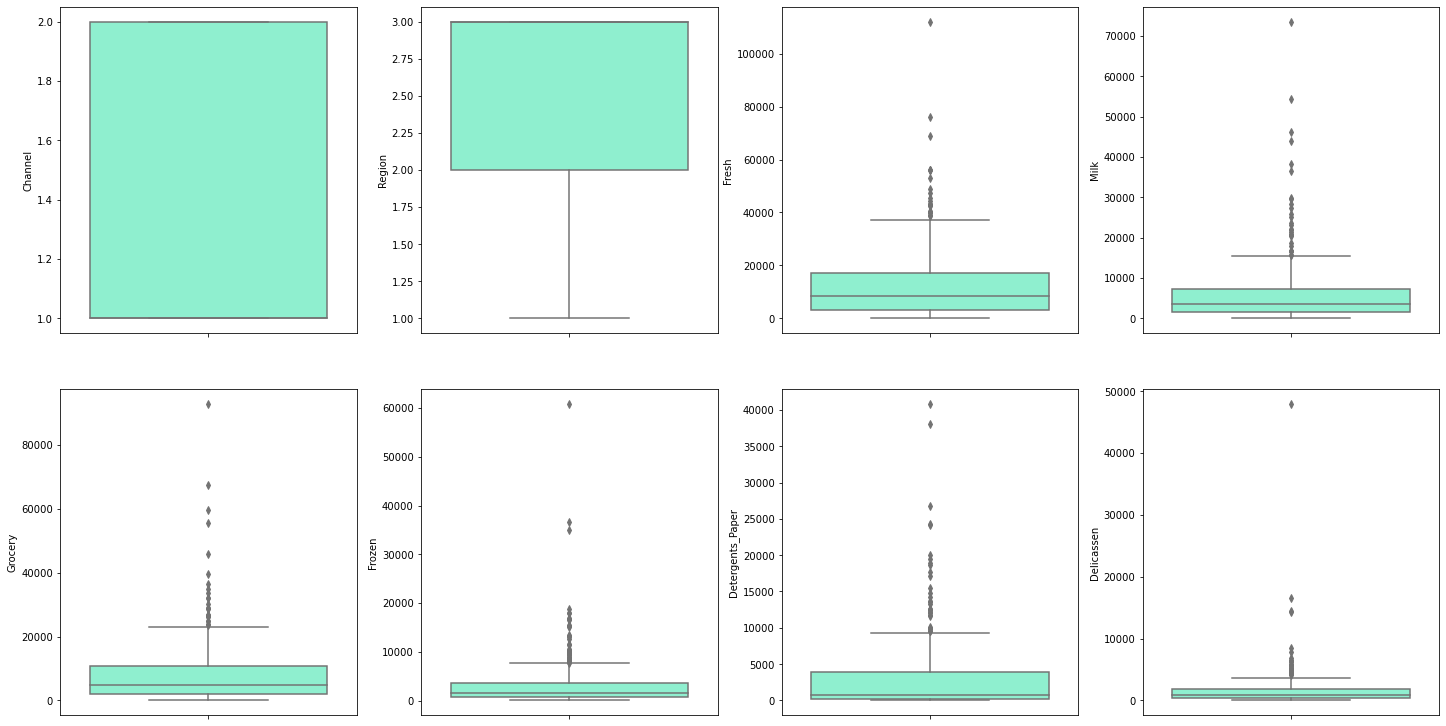

In [6]:
#Gráficas de caja y brazos de las diferentes variables 
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index], color = 'aquamarine')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

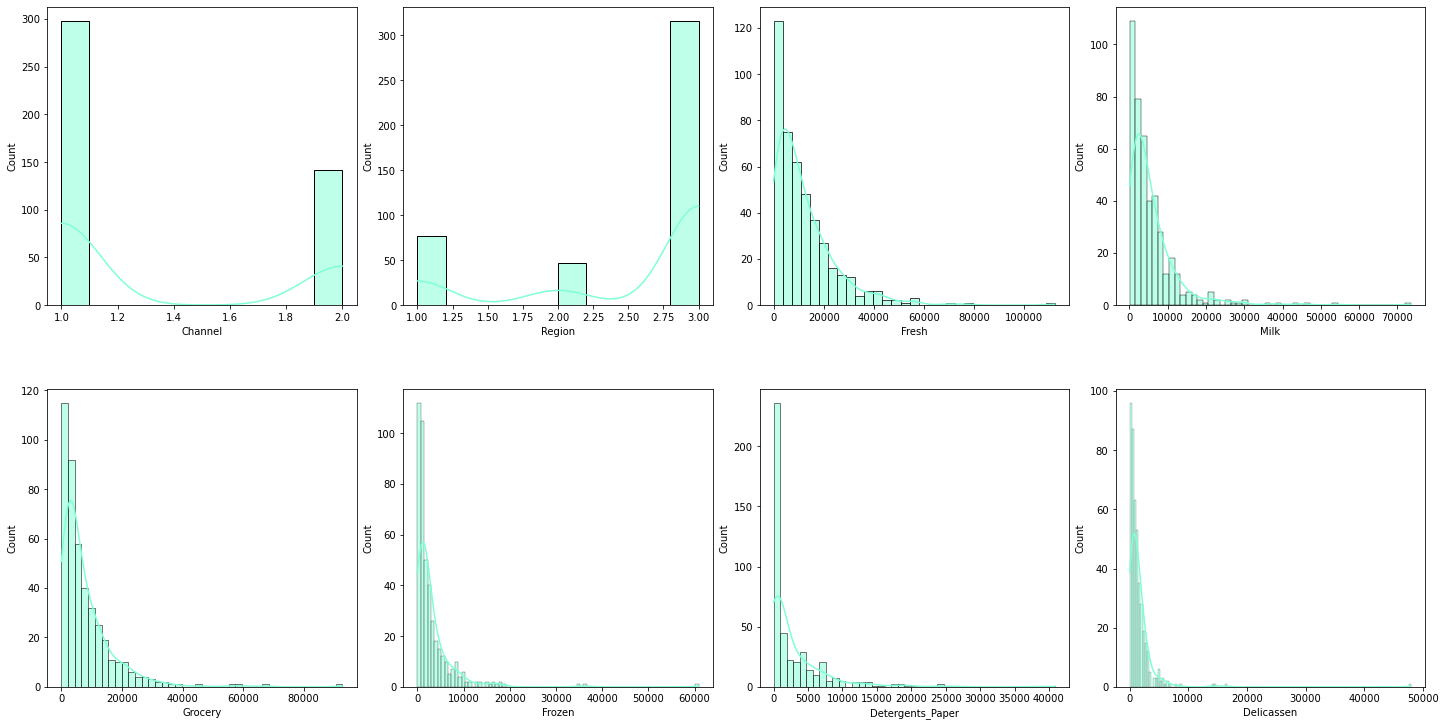

In [7]:
#Gráficas de caja y brazos de las diferentes variables 
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.histplot(x=k, data=df, kde = True, ax=axs[index], color = 'aquamarine')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Información obtenida:
- La mayoría de los datos proviende del canal 1; es decir, gente que compra para negocios como hoteles, restaurantes o cafés.
- Confirmamos que existen bastantes valores fuera del rango intercuantil en las variables numéricas. Sin embargo vamos a quedarnos con dichos outliers ya que pueden ser causados por la gente que compra para abstecer negocios o tiendas minoristas grandes o negocios que necesitan mucho abastecimiento.
- Se visualizan que los datos numéricos siguen una distrubución normal sesgada hacia la derecha generado por las personas que compran para abastecer tiendas minoristas o negocios grandes.

## 1.3 Análisis multivariado

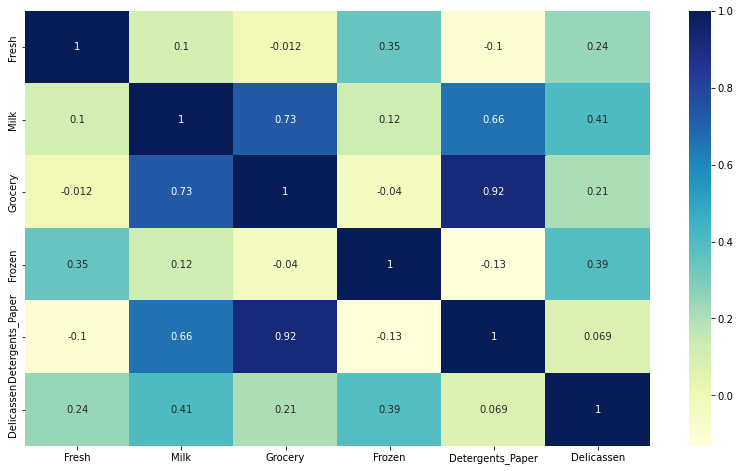

In [8]:
#Matriz de correlación
df = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
fig = plt.figure(figsize = (14,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

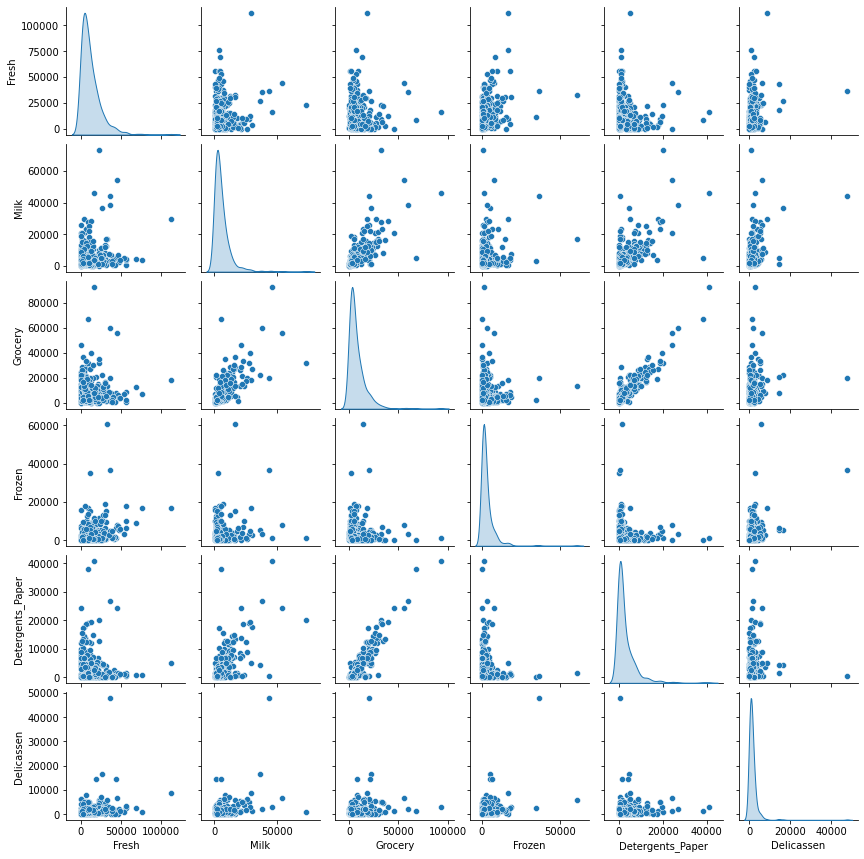

In [9]:
#Gráficas de dispersión
g = sns.pairplot(df, diag_kind = 'kde')
g.fig.set_size_inches(12,12)
plt.show()

Información obtenida:
- De la matriz de correlación encontramos una alta correlación positiva entre Grocery y Detergents_Paper del 0.92 y Milk con Grocery del 0.73, lo que indica que la mayoría de gente que compra De tergentes, papel de baño  o leche, también compra otros productos comestibles. Del resto de categorías no hay correlación lineal.
- En las gráficas de dispersión no visualizamos relaciones aparentes entre dos variables por lo que es en este tipo de problemas donde ocupamos algoritmos de aprendizaje no supervisado para el entendimiento de la data.
- Las gráficas de dispersión tambien nos indican que es necesario estandarizar los datos, ya que hay categorías con valores escalas muy altas que hacen que las gráficas de dispersión se vean muy aplastadas, como el caso de las gráficas donde aparece la variable Delicassen y Frozen.

## 1.4 Preprocesamiento (Escalamiento vs Estandarización vs Normalización) 

Cuando se presentan datos con distintas escalas o magnitudes, es importante transformarlos para que el modelo no le de mayor prioridad o peso a una variable por su escala, ya que muchos modelos se entrenan con promedios, sumas, cálculo de distancias, etc, donde altas magnitudes pueden afectar los resultados.
Existen distintas formas de transformar los datos, a continuación algunas de ellas:

**Escalamiento:**
Es una trasnformación que reescala los valores en un rango entre 0 y 1. Se calculan los máximos y mínimos de la columna y al arreglo que contiene a los datos se le aplica la siguiente transformación:

$$ X_{escalado} = \dfrac{X - min(X)}{max(X) - min(X)}$$

Una desventaja de esta transformación y por la que no la usaremos en este proyecto es que es muy sensible a valores extremos. El ejemplo más claro es con la columna Delicassen, si visualizamos su gráfica de caja y brazos vemos que tiene un valor extremo de casi 50000 mientras que la mayoría de los datos se encuentran por debajo de 5000, por lo que no es conveniente ésta transformación.

**Estandarización:**
Es una transformación que reescala los valores en un rango no específico, pero altera la distribución de los datos de tal forma que el promedio de los datos escalados sea 0 y la varianza sea 1. Esto es muy útil para algoritmos que tienen por hipótesis que los datos se distribuyan de forma normal (como los modelos de regresión lin, multi y polinomial). Se calcula entonces el promedio $\bar{X}$ y la varianza $S$ de la columna y se le aplica la siguiente transformación:

$$ X_{estandarizado} = \dfrac{X - \bar{X}}{S}$$

Cuando hay demasiados valores extremos (como el caso de casi todas las columnas de este dataset), el promedio suele ser muy sensible a estos valores; por lo que se usa la estandarización robusta, que aplica la siguiente transformación:

$$ X_{estandarizado} = \dfrac{X - Rango\;Intercuantil}{S} $$

Ésta transformación igual distribuye los datos de forma normal con varianza cercana a 1 y media cercana 0.

**Normalización:**
Reescala los valores entre -1 y 1, donde cada renglón se considera un vector $X = (X_1,...,X_n)$ y cada columna sus componenetes. Lo que se realiza es dividir cada entrada del vector entre su norma:

$$ X_{normalizado} = \dfrac{X}{||X||^2}$$

Este proceso puede ser util si se planea usar una forma cuadrática como el producto escalar o cualquier otro kernel para cunatificar la similitud de cualquier par de muestras; algo característico en problemas de clasificación de textos y clustering.


In [10]:
# Estandarización de los datos
from sklearn.preprocessing import Normalizer
data_normalizada = Normalizer().fit_transform(df)

In [11]:
#visualizamos como se ve la data sin normalizar
df.values

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

In [12]:
#visualizamos la data normalizada
data_normalizada

array([[0.70833271, 0.53987376, 0.42274083, 0.01196489, 0.14950522,
        0.07480852],
       [0.44219826, 0.61470384, 0.59953989, 0.11040858, 0.20634248,
        0.11128583],
       [0.39655169, 0.5497918 , 0.47963217, 0.15011913, 0.2194673 ,
        0.48961931],
       ...,
       [0.36446153, 0.38846468, 0.7585445 , 0.01096068, 0.37223685,
        0.04682745],
       [0.93773743, 0.1805304 , 0.20340427, 0.09459392, 0.01531   ,
        0.19365326],
       [0.67229603, 0.40960124, 0.60547651, 0.01567967, 0.11506466,
        0.01254374]])

In [13]:
#Gráficas de dispersión de la data estandarizada
df_normalizada = pd.DataFrame(data = data_normalizada, columns = df.columns)
g = sns.pairplot(df_estandarizada, diag_kind = 'kde')
g.fig.set_size_inches(12,12)
plt.show()

NameError: name 'df_estandarizada' is not defined

Información obtenida:
- Se realizó diferentes pruebas y se optará por la transformación de Normalización, ya que se obtiene una mejor visualización al momento de implementar PCA más adelante.
- La normalización (y en general ninguna de las transformaciones mencionadas) no afecta la forma de la distribución de los datos y tampoco la forma de las gráficas de dispersión, por lo que no se pierde información de las variables ni de sus relaciones entre sí.

# 2. Modelos de Machine Learning (Agrupamiento)

Utilizaremos diferentes algoritmos de agrupamiento (clustering) para la mejor comprensión de los datos y poder inferir los productos que son comprados juntos. Los algoritmos que utilizaremos son:
- 2.1 K-Means
- 2.2 Agrupamiento Jerárquico
- 2.3 DBSCAN

## 2.1 K-Means

Técnica que permite dividir los datos en diferentes grupos, donde los registros de cada grupo son similares. Estos grupos (clusters) tienen centroides, que son puntos en el espacio que representan. Un punto pertenece a cluster si la distancia entre este y su centroide es la más pequeña en comparación con los otros centroides.
El algoritmo de K-Means consiste en lo siguiente:
1. Dado un número K, se generan K centroides (ya sea de forma aleatoria o proporcionados por el programador).
2. Se clasifican los datos de acuerdo al centroide más cercano que tengan.
3. Se calcula el centro de masa de los datos de cada cluster y ese centro se convierte en el nuevo centroide, a partir de este se repiten los pasos 2 y 3.

Este procedimiento conforma una iteración y al momento de crear el algoritmo se definen cuanta iteraciones se desea realizar. Este algoritmo normalmente converge muy rápido como se muestra en la siguiente figura:

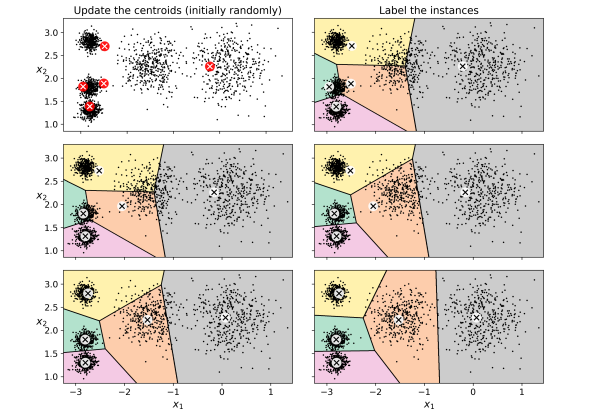
Imagen tomada de: Aurélien Géron. "Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow". (2019). O’Reilly Media, Inc. Pag. 243

Es recomendable parar cuando los centroides de los clústeres ya no cambian, los puntos permanecen en el mismo grupo o si se alcanza el máximo de iteraciones definido.

Lo más importante de este algoritmo es la K proporcionada por el programador, para encontrar la mejor K hay que probar el algoritmo con distintos valores y compararlos a través de una métrica conocida como **Inercia**,  que es el promedio del cuadrado de la distancia entre un punto y su centroide más cercano. Si la Inercia es pequeña, significa que los puntos están más cercas de sus respectivos centroides y por lo tanto, la data está mejor agrupada. Sim embargo, a medida de que aumenta K, siempre va a disminuir la Inercia y un número K tan alto no siempre es mejor. Se utiliza entonces el **método del codo** para visualizar la K más pequeña donde a partir de ella, la inercia ya no cambia demasiado. Hay otro método llamado **método de la silueta** donde se utiliza las distancias media intracluster y la distancia media más cercana a otro cluster disntito, que es más caro computacionalmente y no lo utilizaremos de momento para este proyecto.

In [ ]:
#Importamos el algoritmo K-Means
from sklearn.cluster import KMeans

#Definimos los datos con los que se va a entrenar el modelo
X = data_normalizada

#Hallamos el valor óptimo de K con el método del codo
# Se implementa el algoritmo de K-Means para cada valor de K
inercia = []
for i in range(1,20):
    algoritmo = KMeans(n_clusters = i,           # número K
                      init = 'k-means++',        # centroides de inicio, por default es 'k-means++' y son los mejores centroides
                      max_iter = 300,            # máximo número de iteraciones
                      n_init = 10)               # número de inicios para encontrar los escoger el que tenga los mejores centroides
    algoritmo.fit(X)
    inercia.append(algoritmo.inertia_)

In [ ]:
# Graficamos la curva del método del codo
plt.figure(figsize = [10,6])
plt.plot(range(1,20), inercia, marker = 'o')
plt.title('Método del codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.show()

In [ ]:
#Visualizamos que el codo oscila entre 5 y 7.5 Cluster, por lo que escogemos K = 6
algoritmo = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)               
algoritmo.fit(X)

#Se obtiene los datos de los centroides y etiquetas de cada cluster
centroides, etiquetas = algoritmo.cluster_centers_,  algoritmo.labels_

In [ ]:
#Tenemos 6 centroides, son vectores en R^6 porque hay 6 características
centroides

In [ ]:
#inercia 
algoritmo.inertia_

In [ ]:
#etiquetas del 0 al 5 de los 440 registros en orden
etiquetas

In [ ]:
# Aplicamos reducción de dimencionalidad para la mejor visualización
from sklearn.decomposition import PCA

modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X)

#Se aplica la reducción de dimensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

#Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray']

#Se grafica los puntos que representan a los registros después de aplicar la reducción de dimensión
plt.figure(figsize=(14,8))
for i in range(5):
    puntos_cluster = []
    for j in range(len(etiquetas)):
        if i == etiquetas[j]:
            puntos_cluster.append(pca[j,:])
    puntos_cluster = np.array(puntos_cluster)
    plt.scatter(puntos_cluster[:, 0], puntos_cluster[:,1], c = colores[i], marker = 'o', alpha = 0.4, label = f'Cluster {i}')


#Se grafican los centroides
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], marker = 'X', c = colores, s = 400)

#Se definen arreglos que contienen las componentes de los ejes principales (contienen la información de las categorías)
xvector = modelo_pca.components_[0] 
yvector = modelo_pca.components_[1] 

#Se grafican los vectores que representan las categorías
columnas = df.columns
for i in range(len(columnas)):
    plt.arrow(0,0,xvector[i],yvector[i],color = 'black', width = 0.0005, head_width = 0.02, alpha = 0.75)
    plt.text(xvector[i],yvector[i], list(columnas)[i], color = 'black')

plt.legend()
plt.show()

Información obtenida:
- Como se trata de un problema de 6 categorías, el espacio de características es de 6 dimensiones. Sin embargo, con ayuda de la técnica de Análisis de Componentes Principales (PCA), se pudo reducir la dimensionalidad, teniendo una representación 2-dimensional de este espacio de características.
- El PCA se caracteriza por no perder tanta información en el proceso (ya que proyecta los puntos en el espacio 6-Dimensional en un plano 2-D conformado por 2 vectores que maximizan la varianza y por lo tanto conservan más información). Una prueba de ello es que se logra distinguir los 5 clusteres en distintos colores y su tendencia a estar en distintas partes del espacio 2-Dimensional, lo que significa que son de características similares.
- Las flechas negras se obtuvieron de las componentes de los 2 ejes principales que se obtienen del PCA. A medida de que un punto está más cerca de la punta de una de estas flechas, significa que es un cliente que gastó más en ese tipo de producto.
- Con lo mencionado anteriormente podemos decir, que los productos de Grocery, Milk y Detergents_Paper al estar muy cerca entre sí,  son productos que son comprados regularmente juntos por lo que algo razonable es que se coloquen juntos. Los productos Fresh y Frozen están muy separados entre sí, por lo que deberán de colocarse por separado.

## 2.2 Agrupamiento Jerárquico

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title('Dendrograma')
dendrograma = shc.dendrogram(shc.linkage(X,method = 'ward'))

In [ ]:
#Importamos el algoritmo K-Means
from sklearn.cluster import AgglomerativeClustering

#Definimos los datos con los que se va a entrenar el modelo
X = data_normalizada

#Entrenamos el algoritmo
algoritmo = AgglomerativeClustering(n_clusters = 5, 
                                    affinity = 'euclidean', #tipo de medida de distancia para la vinculación
                                    linkage = 'ward')       #Criterio de vinculación
algoritmo.fit(X)

#Se obtiene los datos de los centroides y etiquetas de cada cluster
etiquetas = algoritmo.labels_

In [ ]:
etiquetas

In [ ]:

modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X)

#Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray']

#Se grafica los puntos que representan a los registros después de aplicar la reducción de dimensión
plt.figure(figsize=(14,8))
for i in range(5):
    puntos_cluster = []
    for j in range(len(etiquetas)):
        if i == etiquetas[j]:
            puntos_cluster.append(pca[j,:])
    puntos_cluster = np.array(puntos_cluster)
    plt.scatter(puntos_cluster[:, 0], puntos_cluster[:,1], c = colores[i], marker = 'o', alpha = 0.4, label = f'Cluster {i}')

plt.legend()
plt.show()